# Amazon_review_sentiment_analysis

## Load Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import ndjson # using ndjson as data loader

In [20]:
# loading data from json file
with open('./data/Appliances.json') as f:
    data = ndjson.load(f)

In [21]:
df = pd.DataFrame(data)

In [22]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


### Data Dictionry <br>
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B <br>
asin - ID of the product, e.g. 0000013714 <br>
reviewerName - name of the reviewer <br>
vote - helpful votes of the review <br>
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover" <br>
reviewText - text of the review <br>
overall - rating of the product <br>
summary - summary of the review <br>
unixReviewTime - time of the review (unix time) <br>
reviewTime - time of the review (raw) <br>
image - images that users post after they have received the product <br>

## Exploratory Data Analysis

In [23]:
df.shape

(602777, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         602777 non-null  float64
 1   vote            65262 non-null   object 
 2   verified        602777 non-null  bool   
 3   reviewTime      602777 non-null  object 
 4   reviewerID      602777 non-null  object 
 5   asin            602777 non-null  object 
 6   style           137973 non-null  object 
 7   reviewerName    602762 non-null  object 
 8   reviewText      602453 non-null  object 
 9   summary         602649 non-null  object 
 10  unixReviewTime  602777 non-null  int64  
 11  image           9258 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 51.2+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

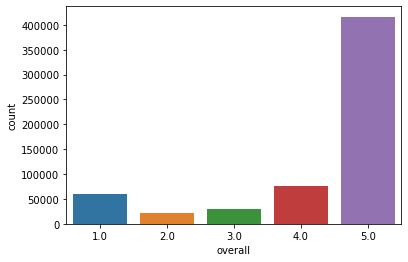

In [30]:
# The overall rating of this dataset is imbalance. We need use a sampling technique.
sns.countplot(data = df, x="overall")

In [26]:
df.isna().sum()

overall                0
vote              537515
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             464804
reviewerName          15
reviewText           324
summary              128
unixReviewTime         0
image             593519
dtype: int64

In [31]:
# we are going to ignore vote, style reviewerName and image columns but not summary or review text columns.
df.dropna(axis=0, subset=['reviewText','summary'], inplace=True)

In [32]:
# Now, all the rows with null summary or review text is dropped.
df.isna().sum()

overall                0
vote              537109
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             464489
reviewerName          15
reviewText             0
summary                0
unixReviewTime         0
image             593153
dtype: int64

In [38]:
df['overall'].value_counts(dropna=False)

5.0    415937
4.0     75430
1.0     59603
3.0     30641
2.0     20729
Name: overall, dtype: int64

In [66]:
def sampling(df, n_sample):
    onestar   = df[df['overall']==1.0].sample(n=n_sample[0], random_state=4444)
    twostar   = df[df['overall']==2.0].sample(n=n_sample[1], random_state=4444)
    threestar = df[df['overall']==3.0].sample(n=n_sample[2], random_state=4444)
    fourstar  = df[df['overall']==4.0].sample(n=n_sample[3], random_state=4444)
    fivestar  = df[df['overall']==5.0].sample(n=n_sample[4], random_state=4444)
    sample_df = pd.concat([onestar, twostar, threestar, fourstar, fivestar], axis=0).reset_index(drop=True)
    return sample_df

In [70]:
# because 2-3-4 stars reviews are considered as neutral, we're going to take the sample with 3:1:1:1:3 ratio
sample_df = sampling(df,[9000,3000,3000,3000,9000])

In [71]:
sample_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1.0,NaN,True,"08 18, 2017",AOCVHLMSVFN9Q,B002HT0958,NaN,Shaolin Sneakerhead,garbage,garbage,1503014400,NaN
1,1.0,2,True,"04 18, 2017",A3NN69KYT2JBFC,B0139C9QQY,NaN,G. W.,I purchased IcePure because it seemed like a g...,I purchased IcePure because it seemed like a g...,1492473600,NaN
2,1.0,NaN,False,"03 4, 2013",AXM4KG7V79VWJ,B001P0O5WI,NaN,Power Surfer,"It leaves detergent deposits, which happens ab...",Junk - Flee this Garbage,1362355200,NaN
3,1.0,11,True,"01 1, 2015",A15WTATJN9X096,B00MG13AUS,NaN,Susana,We have a kitchenaid refrigerator and this pro...,do NOT buy for KITCHENAID,1420070400,NaN
4,1.0,NaN,True,"12 16, 2015",A1Y38JINVTLHFZ,B00GECX2VW,NaN,Liway Hsi,This dryer is not reliable. It quits running a...,This dryer is not reliable. It quits running a...,1450224000,NaN


<AxesSubplot:xlabel='overall', ylabel='count'>

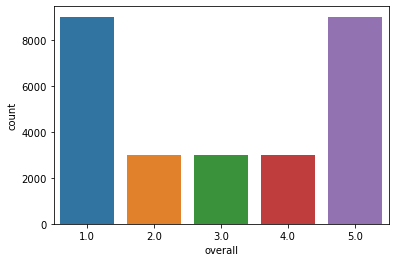

In [72]:
# Now we have a new df with balance labels.
sns.countplot(data=sample_df, x="overall")

In [73]:
# create another dataset with random sampling.
random_df = df.sample(n=100000, random_state=4444)

<AxesSubplot:xlabel='overall', ylabel='count'>

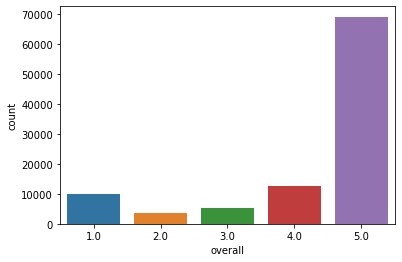

In [74]:
# show labels from random sample dataset
sns.countplot(data=random_df, x="overall")

In [75]:
## export processed datasets
sample_df.to_csv("./data/sample_df.csv", index=False)
random_df.to_csv("./data/random_df.csv", index=False)